In [2]:
import librosa # Library used to extract features from Dataset
import soundfile # Library used to read Sound Files
import os, glob # Library used to Extract Files from a Location
import numpy as np # Library used for Calculations
from sklearn.model_selection import train_test_split # Library used to split the Dataset for Training of Model
from sklearn.neural_network import MLPClassifier # Classifier Model
from sklearn.metrics import accuracy_score # Metrics to determine the Model
import joblib # Library to save and load model
import tkinter as tk # Library used for UI 
from tkinter import filedialog, messagebox # Library used for UI
import matplotlib.pyplot as plt # Library used to plot graphs

In [3]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [4]:
#Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [5]:
#Load the data and extract features for each sound file
def load_data(test_size=0.2):
  x,y=[],[]
  for file in glob.glob("SER_dataset/Actor_*/*.wav"):
      file_name=os.path.basename(file)
      emotion=emotions[file_name.split("-")[2]]
      if emotion not in observed_emotions:
          continue
      feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
      x.append(feature)
      y.append(emotion)
  return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [6]:
#Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [7]:
#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [8]:
#Shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


# Hyperparameter Tuning


C:\Users\My PC\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\My PC\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


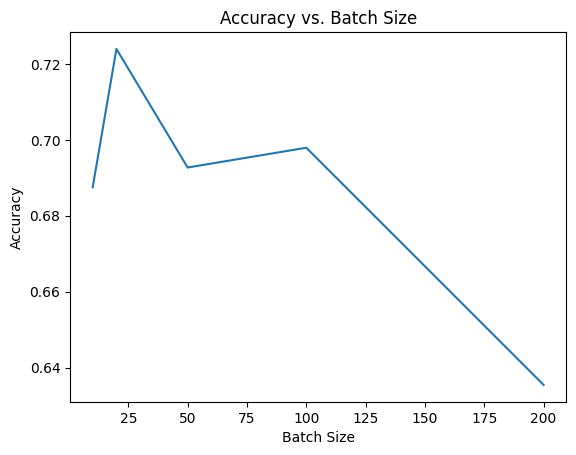

In [83]:

batch_sizes = [10, 20, 50, 100, 200]
accuracies = []

for batch_size in batch_sizes:
    model = MLPClassifier(alpha=0.01, batch_size=batch_size, epsilon=1e-08, hidden_layer_sizes=(256,), learning_rate='adaptive', max_iter=100)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    accuracies.append(accuracy)

plt.plot(batch_sizes, accuracies)
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Batch Size')
plt.show()


C:\Users\mythr\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


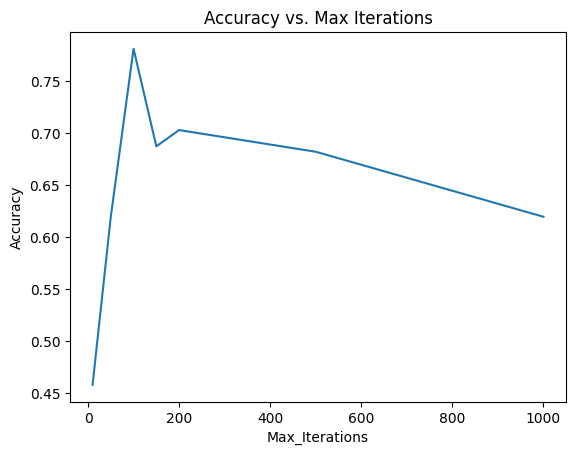

In [13]:
max_iters = [10, 50, 100, 150, 200, 500, 1000]
accuracies = []

for max_iter in max_iters:
    model = MLPClassifier(alpha=0.01, batch_size=20, epsilon=1e-08, hidden_layer_sizes=(256,), learning_rate='adaptive', max_iter=max_iter)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    accuracies.append(accuracy)

plt.plot(max_iters, accuracies)
plt.xlabel('Max_Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Max Iterations')
plt.show()


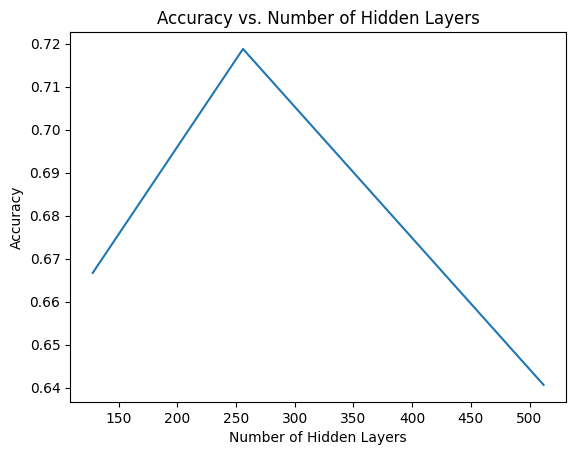

In [12]:
hidden_layer_sizes = [(128,), (256,), (512,)]
accuracies = []

for hidden_layer_size in hidden_layer_sizes:
    model = MLPClassifier(alpha=0.01, batch_size=20, epsilon=1e-08, hidden_layer_sizes=hidden_layer_size, learning_rate='adaptive', max_iter=150)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    accuracies.append(accuracy)

plt.plot(hidden_layer_sizes, accuracies)
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Hidden Layers')
plt.show()

In [13]:
model = MLPClassifier(alpha=0.01, batch_size=20, epsilon=1e-08, hidden_layer_sizes=(252,), learning_rate='adaptive', max_iter=150)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy : {accuracy}")

Accuracy : 0.7604166666666666


In [89]:
# Save the model to a file
joblib.dump(model, 'best_model_1.joblib')

['best_model.joblib']

# UI

In [14]:
# Load the trained model from file
model = joblib.load('best_model.joblib')

# Define a function to extract features from an audio file
def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    if chroma:
        stft = np.abs(librosa.stft(X))
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result = np.hstack((result, mfccs))
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
        result = np.hstack((result, chroma))
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
        result = np.hstack((result, mel))
    return result

# Define a function to predict the emotion from an audio file
def predict_emotion(file_path):
    # Extract features from the audio file
    feature = extract_feature(file_path, mfcc=True, chroma=True, mel=True)
    # Reshape the feature array
    feature = feature.reshape(1, -1)
    # Make the prediction
    emotion = model.predict(feature)[0]
    # Map the predicted label to the corresponding emotion
    return emotion

# Define the path to the test folder
test_path = 'Test_Data'

for file in os.listdir(test_path):
    file_path = test_path + "\\" + file
    predicted_emotion = predict_emotion(file_path)
    print(f"File : ({file}) --------> {predicted_emotion}")


File : (03-01-02-01-01-01-02.wav) --------> calm
File : (03-01-02-01-01-02-02.wav) --------> happy
File : (03-01-02-01-01-02-10.wav) --------> disgust
File : (03-01-02-01-02-01-02.wav) --------> calm
File : (03-01-02-01-02-02-02.wav) --------> happy
File : (03-01-02-01-02-02-10.wav) --------> disgust
File : (03-01-02-02-01-01-02.wav) --------> happy
File : (03-01-02-02-01-01-10.wav) --------> happy
File : (03-01-02-02-01-02-02.wav) --------> happy
File : (03-01-02-02-01-02-10.wav) --------> calm
File : (03-01-02-02-02-01-10.wav) --------> fearful
File : (03-01-02-02-02-02-10.wav) --------> calm
File : (03-01-03-01-01-01-10.wav) --------> happy
File : (03-01-03-01-01-02-10.wav) --------> happy
File : (03-01-03-01-02-01-10.wav) --------> happy
File : (03-01-05-01-02-01-10.wav) --------> fearful
File : (my3.wav) --------> happy


In [15]:
# Load the trained model from file
model = joblib.load('best_model.joblib')

# Define a function to extract features from an audio file
def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    if chroma:
        stft = np.abs(librosa.stft(X))
    result = np.array([])
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result = np.hstack((result, mfccs))
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
        result = np.hstack((result, chroma))
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
        result = np.hstack((result, mel))
    return result

# Define a function to predict the emotion from an audio file
def predict_emotion(file_path):
    # Extract features from the audio file
    feature = extract_feature(file_path, mfcc=True, chroma=True, mel=True)
    # Reshape the feature array
    feature = feature.reshape(1, -1)
    # Make the prediction
    emotion = model.predict(feature)[0]
    # Map the predicted label to the corresponding emotion
    return emotion

# Define a function to handle the file selection
def select_file():
    file_path = filedialog.askopenfilename() #read and open a File
    if file_path:
        try:
            predicted_emotion = predict_emotion(file_path) # prediction of the input file
            messagebox.showinfo("Prediction Result", f"The predicted emotion is {predicted_emotion}")
        except:
            messagebox.showerror("Prediction Error", "An error occurred while predicting the emotion.")

# Create the main window
window = tk.Tk()
window.title("Emotion Detection")
window.geometry("300x100")

# Create the "Select File" button
button = tk.Button(window, text="Select File", command=select_file)
button.pack(pady=20)

# Start the main loop
window.mainloop()
